In [2]:
from keras.models import Model
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.callbacks import LearningRateScheduler, History
from keras.layers import Input, Flatten, Dense, Dropout, Activation
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.initializers import VarianceScaling
from keras.optimizers import SGD

import numpy as np
import matplotlib.pyplot as plt

/Users/spradhan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Hide TensorFlow's Gripes

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Import Data

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print (x_train.shape)

(50000, 32, 32, 3)


In [ ]:


# Scale Image Data

x_train = x_train/255.
x_test = x_test/255.

# Make One-Hot Targets

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Optimization Parameters

epochs  = 15      # Epochs to train for
batch   = 35       # Batch size
lr      = 0.01     # Learning rate
dec     = 0.4      # Learning rate decrease factor
mom     = 0.9      # Momentum

# Build Optimizer

opt = SGD(lr=lr, momentum=mom)

def schedule(ep):
	if   ep < int(.50*epochs): return lr*dec**0
	elif ep < int(.70*epochs): return lr*dec**1
	elif ep < int(.85*epochs): return lr*dec**2
	else:                      return lr*dec**3

lr_schedule = LearningRateScheduler(schedule)

# Name Your Model!

model_name = 'cifar'

# Track Loss History

history = History()

# Build Network

inp = Input(shape=x_train.shape[1:])
x = inp
x = Conv2D(32,3,activation='relu',padding='same')(x)
#x = Dropout(0.2)(x)
x = Conv2D(32,3,activation='relu',padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64,3,activation='relu',padding='same')(x)
#x = Dropout(0.2)(x)
x = Conv2D(64,3,activation='relu',padding='same')(x)
#x = MaxPooling2D()(x)
x = Conv2D(128,3,activation='relu',padding='same')(x)
#x = Dropout(0.2)(x)
x = Conv2D(128,3,activation='relu',padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(256,3,activation='relu',padding='same')(x)
#x = Dropout(0.2)(x)
x = Conv2D(256,3,activation='relu',padding='same')(x)
x = GlobalAveragePooling2D()(x)
x = Dense(10)(x)
x = Activation('softmax')(x)

out = x
model = Model(inp, out)
print ('Parameters:',model.count_params())

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train Network

model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=epochs,
          batch_size=batch,
          callbacks=[history, lr_schedule],
          verbose=1)

# Save Loss History

np.savez(model_name + '.npz',
		 loss=history.history['loss'],
		 val_loss=history.history['val_loss'],
		 acc=history.history['acc'],
		 val_acc=history.history['val_acc'])


Parameters: 1174826
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 659s 13ms/step - loss: 2.0164 - acc: 0.2408 - val_loss: 1.8083 - val_acc: 0.3482
Epoch 2/15
23870/50000 [=============>................] - ETA: 23:02 - loss: 1.7265 - acc: 0.3580

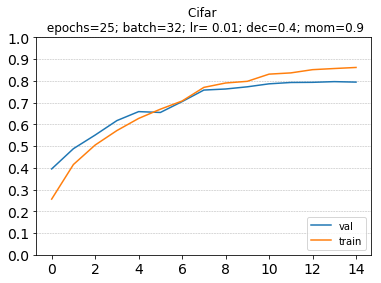

In [4]:
# Plot Loss History

plt.plot(history.history['val_acc'], label='val')
plt.plot(history.history['acc'], label='train')
plt.legend(loc='lower right')
plt.ylim([0,1])
plt.xticks(fontsize=14)
plt.yticks(np.linspace(0., 1., 11), fontsize=14)
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
filetype='.png'
plt.savefig(model_name + filetype)
plt.title("Cifar \n epochs=25; batch=32; lr= 0.01; dec=0.4; mom=0.9")
plt.show()


### Default
Epoch 23/25

50000/50000 [==============================] - 268s 5ms/step - loss: 0.7606 - acc: 0.7327 - val_loss: 1.1254 - val_acc: 0.6184

Epoch 24/25

50000/50000 [==============================] - 72s 1ms/step - loss: 0.7531 - acc: 0.7345 - val_loss: 1.1287 - val_acc: 0.6176

Epoch 25/25

50000/50000 [==============================] - 67s 1ms/step - loss: 0.7457 - acc: 0.7376 - val_loss: 1.1273 - val_acc: 0.6200

# 32-32-64-64-128-128 without drop out

Parameters: 288298
Train on 50000 samples, validate on 10000 samples

Epoch 1/15

50000/50000 [==============================] - 239s 5ms/step - loss: 1.9228 - acc: 0.2759 - val_loss: 1.6525 - val_acc: 0.3841

Epoch 2/15

50000/50000 [==============================] - 240s 5ms/step - loss: 1.4965 - acc: 0.4462 - val_loss: 1.2977 - val_acc: 0.5288

Epoch 3/15

50000/50000 [==============================] - 238s 5ms/step - loss: 1.2386 - acc: 0.5509 - val_loss: 1.0706 - val_acc: 0.6227

Epoch 4/15

50000/50000 [==============================] - 238s 5ms/step - loss: 1.0387 - acc: 0.6278 - val_loss: 1.0043 - val_acc: 0.6510

Epoch 5/15

50000/50000 [==============================] - 247s 5ms/step - loss: 0.9047 - acc: 0.6812 - val_loss: 0.8548 - val_acc: 0.7018

Epoch 6/15

50000/50000 [==============================] - 241s 5ms/step - loss: 0.7903 - acc: 0.7213 - val_loss: 0.7895 - val_acc: 0.7299

Epoch 7/15

50000/50000 [==============================] - 243s 5ms/step - loss: 0.7019 - acc: 0.7542 - val_loss: 0.7251 - val_acc: 0.7465

Epoch 8/15

50000/50000 [==============================] - 338s 7ms/step - loss: 0.5358 - acc: 0.8124 - val_loss: 0.6822 - val_acc: 0.7670

Epoch 9/15

50000/50000 [==============================] - 249s 5ms/step - loss: 0.4869 - acc: 0.8295 - val_loss: 0.6395 - val_acc: 0.7831

Epoch 10/15

50000/50000 [==============================] - 250s 5ms/step - loss: 0.4520 - acc: 0.8422 - val_loss: 0.6524 - val_acc: 0.7797

Epoch 11/15

50000/50000 [==============================] - 249s 5ms/step - loss: 0.3631 - acc: 0.8737 - val_loss: 0.6109 - val_acc: 0.7955

Epoch 12/15

50000/50000 [==============================] - 250s 5ms/step - loss: 0.3402 - acc: 0.8815 - val_loss: 0.6111 - val_acc: 0.8012

Epoch 13/15

50000/50000 [==============================] - 251s 5ms/step - loss: 0.2942 - acc: 0.8990 - val_loss: 0.6170 - val_acc: 0.8036

Epoch 14/15

50000/50000 [==============================] - 255s 5ms/step - loss: 0.2819 - acc: 0.9044 - val_loss: 0.6325 - val_acc: 0.8035

Epoch 15/15

50000/50000 [==============================] - 250s 5ms/step - loss: 0.2713 - acc: 0.9087 - val_loss: 0.6265 - val_acc: 0.8048